In [1]:
import os, glob, random
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO


In [4]:
# Use the same split dataset
split_base = r"/home/memad/Desktop/Road Damage Detection/dataset"

IM_DIR = r"/home/memad/Desktop/Road Damage Detection/dataset/train/images"
LBL_DIR = r"/home/memad/Desktop/Road Damage Detection/dataset/train/labels"

MODEL_DIR = r"/home/memad/Desktop/Road Damage Detection/models/road_damage/weights"


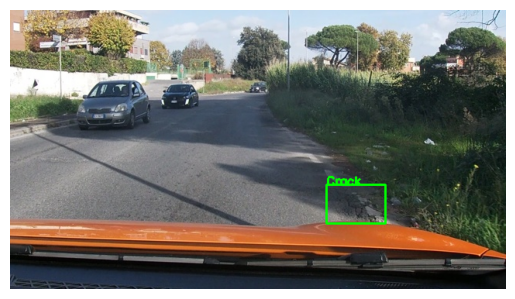

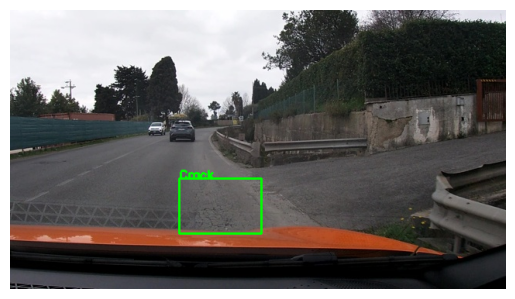

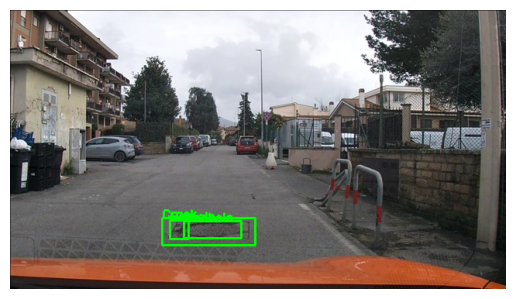

In [6]:
import os, cv2, glob, random
import numpy as np
import matplotlib.pyplot as plt

def plot_image_with_boxes(img_path, lbl_path, class_names):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    if os.path.exists(lbl_path):
        with open(lbl_path) as f:
            lines = f.readlines()
        h, w = img.shape[:2]

        for line in lines:
            parts = list(map(float, line.strip().split()))
            cls = int(parts[0])
            coords = parts[1:]

            if len(coords) == 4:
                # Standard YOLO box (cx, cy, w, h)
                cx, cy, bw, bh = coords
                x1 = int((cx - bw/2) * w)
                y1 = int((cy - bh/2) * h)
                x2 = int((cx + bw/2) * w)
                y2 = int((cy + bh/2) * h)
                cv2.rectangle(img, (x1,y1), (x2,y2), (255,0,0), 2)
                cv2.putText(img, class_names[cls], (x1, y1-5),
                            cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,0,0), 2)

            else:
                # Polygon format (x1,y1,x2,y2,... normalized)
                pts = np.array(coords).reshape(-1, 2)
                pts[:, 0] *= w
                pts[:, 1] *= h
                pts = pts.astype(int)
                cv2.polylines(img, [pts], isClosed=True, color=(0,255,0), thickness=2)
                cv2.putText(img, class_names[cls], tuple(pts[0]),
                            cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,255,0), 2)

    plt.imshow(img)
    plt.axis("off")
    plt.show()


# Example usage
IM_DIR = r"/home/memad/Desktop/Road Damage Detection/dataset/train/images"
LBL_DIR = r"/home/memad/Desktop/Road Damage Detection/dataset/train/labels"
class_names = ["Pothole", "Crack", "Manhole"]

samples = random.sample(glob.glob(os.path.join(IM_DIR, "*.*")), 3)
for img_path in samples:
    lbl_path = os.path.join(LBL_DIR, os.path.splitext(os.path.basename(img_path))[0] + ".txt")
    plot_image_with_boxes(img_path, lbl_path, class_names)


In [7]:
# Load best model weights from training
model_path = os.path.join(MODEL_DIR, "best.pt")
model = YOLO(model_path)



image 1/1 /home/memad/Desktop/Road Damage Detection/dataset/val/images/vlcsnap-2025-02-19-14h30m10s427.jpg: 384x640 1 Manhole, 61.1ms
Speed: 2.7ms preprocess, 61.1ms inference, 161.3ms postprocess per image at shape (1, 3, 384, 640)


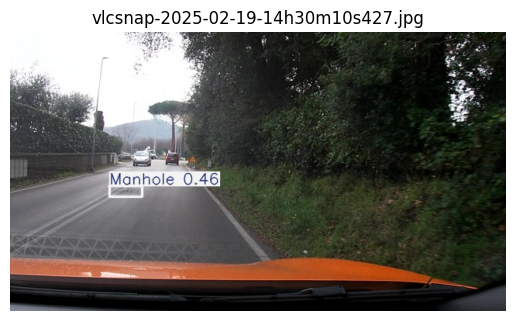


image 1/1 /home/memad/Desktop/Road Damage Detection/dataset/val/images/vlcsnap-2025-02-19-14h29m25s660.jpg: 384x640 1 Pothole, 4 Manholes, 5.5ms
Speed: 1.2ms preprocess, 5.5ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


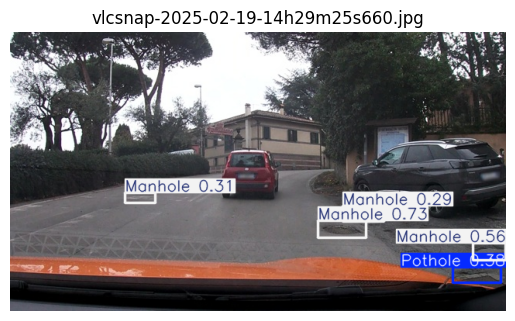


image 1/1 /home/memad/Desktop/Road Damage Detection/dataset/val/images/vlcsnap-00021.jpg: 384x640 1 Pothole, 5.5ms
Speed: 16.6ms preprocess, 5.5ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)


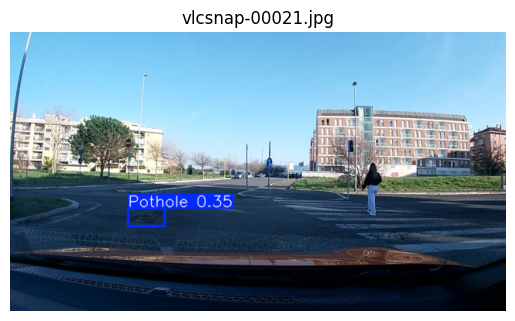

In [13]:
import glob, random, os
import cv2
import matplotlib.pyplot as plt

# Collect validation image files
val_images = glob.glob(r"/home/memad/Desktop/Road Damage Detection/dataset/val/images/*.*")

if not val_images:
    print("No validation images found")
else:
    test_samples = random.sample(val_images, min(3, len(val_images)))

    for img_path in test_samples:
        results = model(img_path)  # prediction
        res_plotted = results[0].plot()  # numpy BGR
        plt.imshow(cv2.cvtColor(res_plotted, cv2.COLOR_BGR2RGB))
        plt.title(os.path.basename(img_path))
        plt.axis("off")
        plt.show()


In [16]:
# Evaluate on validation set
metrics = model.val(
    data=r"/home/memad/Desktop/Road Damage Detection/dataset/dataset.yaml",  # dataset config from training
    split="val"
)

Ultralytics 8.3.195 🚀 Python-3.10.12 torch-2.8.0+cu128 CUDA:0 (NVIDIA GeForce RTX 3060 Laptop GPU, 5938MiB)


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 325.4±87.8 MB/s, size: 113.2 KB)
val: Scanning /home/memad/Desktop/Road Damage Detection/dataset/val/labels.cache... 200 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 200/200 301.2Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 13/13 0.2it/s 1:07<0.1s
                   all        200        467      0.562      0.547      0.541      0.254
               Pothole         86        123      0.496       0.48      0.462      0.195
                 Crack        129        235      0.483      0.381      0.354      0.138
               Manhole         87        109      0.707       0.78      0.808      0.429
Speed: 0.9ms preprocess, 2.4ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to /home/memad/Desktop/Road Damage Detection/notebooks/runs/detect/val
